# DC-Motor Calculation PARAGON Actuator Spoiler

Siehe Anfrage vom 14. August 2018 (Email Herr Sielhorst)

In [1]:
from MotorCalc import *
import matplotlib.pyplot as plt
import numpy as np

supplier = "Nichibo"
motor_name_supplier = "KP3N-35110"
motor_name = "C3857F3C-45-12.0-001"
U_N=10.8
I_0=0.15
I_S=8.33
M_S=2020*9.81E-5            #stall current
k_M=M_S/I_S                #torque constant
R=12.0/I_S                   #terminal resistance

M_WP_system = 2.5
n_WP_system = 25
GB_ratio = 150
GB_eta = 0.8

M_WP = M_WP_system/GB_ratio/GB_eta       #torque @ Working Point
n_WP = n_WP_system*GB_ratio             #speed @ Working Point
P_mech_des=M_WP*n_WP*np.pi/30


print("desired torque = {:0.2f}mNm, desired speed = {:0.0f}rpm".format(1000.0*M_WP, n_WP))
print("desired mech. power = {:0.2f}W".format(P_mech_des))
print("mech. power system = {:0.2f}W".format(M_WP_system*n_WP_system*np.pi/30))

desired torque = 20.83mNm, desired speed = 3750rpm
desired mech. power = 8.18W
mech. power system = 6.54W


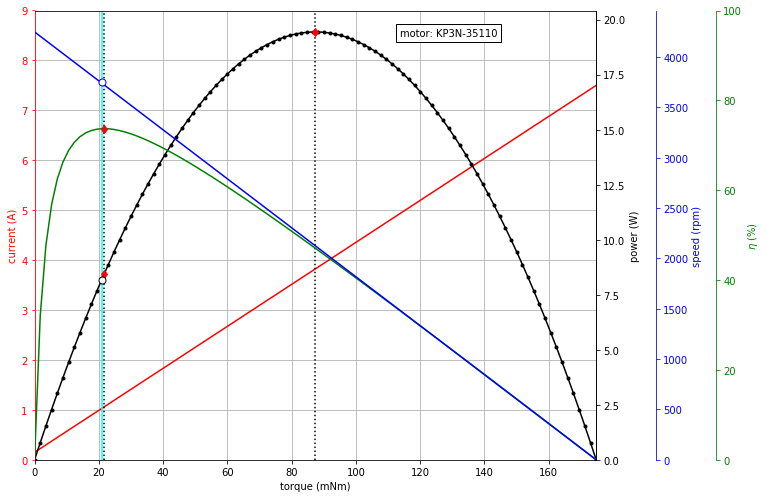

In [2]:
m=CDCMotor(U_N=U_N,R=R,I_0=I_0,k_M=k_M, M_WP = M_WP, n_WP = n_WP, motor_name=motor_name_supplier)

m.plotCurves()


### Tabelle mit Motor-Parametern

| Name | Unit | Value | Comment
|:---|:---:|:---:|:---
|**Input parameter**
|$U_{\rm{N}}$| V | {{m.U_N}} | operating Voltage
|$I_0$|A|{{m.I_0}}| no load current
|$k_{\rm{M}}$|mNm/A|{{"{:0.2f}".format(m.k_M*1000)}}| torque constant
|$R$|$\Omega$|{{"{:0.2f}".format(m.R)}}|terminal resistance
|**Output parameter**
|$I_{\rm{S}}$|A|{{"{:0.2f}".format(m.I_S)}}| stall current
|$I_{\rm{meff}}$|A|{{"{:0.2f}".format(m.I_meff)}}|current @ $\eta_{\rm{max}}$
|$n_0$|min$^{-1}$|{{"{:0.0f}".format(m.n_0)}}| no load speed
|$n_{\rm{meff}}$|min$^{-1}$|{{"{:0.0f}".format(m.n_meff)}}| speed @ $\eta_{\rm{max}}$
|$M_{\rm{S}}$|mNm|{{"{:0.2f}".format(m.M_S*1000)}}| stall torque
|$M_{\rm{0}}$|mNm|{{"{:0.2f}".format(m.M_0*1000)}}| loss torque
|$M_{\rm{meff}}$|mNm|{{"{:0.2f}".format(m.M_meff*1000)}}| torque @ $\eta_{\rm{max}}$
|$M_{\rm{max power}}$|mNm|{{"{:0.2f}".format(m.M_maxpower*1000)}}| torque @ $P_{\rm{max}}$
|$P_{\rm{meff}}$|W|{{"{:0.2f}".format(m.P_meff)}}| power @ $\eta_{\rm{max}}$
|$P_{\rm{max}}$|W|{{"{:0.2f}".format(m.P_maxpower)}}| max. power
|$\eta_{\rm{max}}$| % | {{"{:0.2f}".format(m.eta_max*100.0)}} | max. efficiency

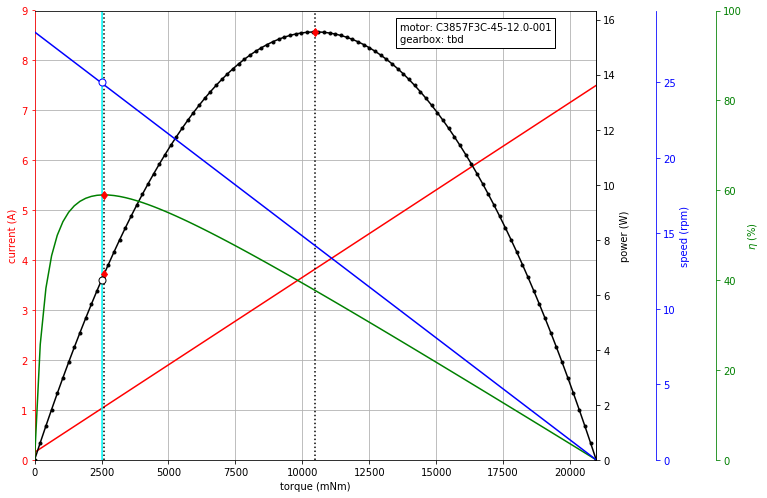

In [3]:
ms=CDCMotorWithGearbox(U_N=U_N,R=R, I_0=I_0, k_M=k_M, M_WP_system=M_WP_system, n_WP_system = n_WP_system, motor_name=motor_name, GB_name='tbd', GB_ratio=GB_ratio, GB_eta=GB_eta)
ms.plotSystemCurves()

## Systeminformation

### Anwendung
Motor-Getriebe-Kombination zum Verstellen eines Spoilers, z.B. bei Porsche. Die Motor-Getriebe-Kombination muss möglichst leise sein, daher schlägt der Kunde ein Planetengetriebe vor.

### T-Bereich
-40°C ... +80°C

### Zyklen / Lebensdauer
100000 Zyklen mit weniger als 360° am Abtrieb (jeweils hin und zurück).

### Betriebsdaten
* U_N = 10.8V
* T = 20°C (RT)
* n_WP_System = 25 RPM
* M_WP_System = 2.5 Nm


In [4]:
n_total = 100000*2*GB_ratio
lifetime=100000*2/25/60

In [5]:
print("Anzahl an Umdrehungen: {:0.0f}, Betriebszeit: {:0.0f}h".format(n_total,lifetime))

Anzahl an Umdrehungen: 30000000, Betriebszeit: 133h
